In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
import random
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from tensorflow.keras.utils import to_categorical

Segmentation Models: using `keras` framework.


In [2]:
train_img_dir = "data/train_images/train/"
train_mask_dir = "data/train_masks/train/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))


img_num = random.randint(0, num_images-1)

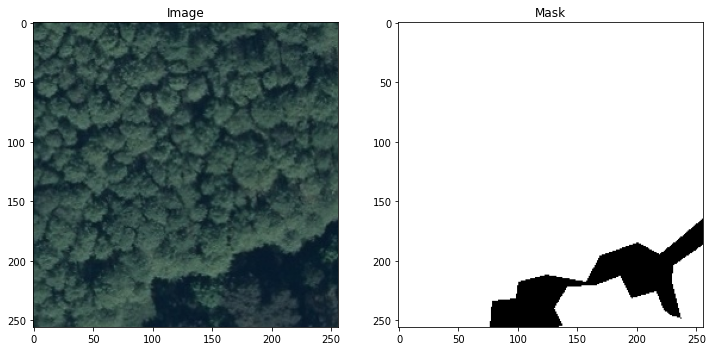

In [3]:
img_for_plot = cv2.imread(train_img_dir+img_list[img_num], 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir+msk_list[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

In [4]:
seed=24
batch_size= 16
n_classes=4

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from keras.utils import to_categorical

#Use this to preprocess input for transfer learning
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [15]:
def preprocess_data(img, mask, num_class):
    
    #Scale images
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    print('scaler', img)
    img = preprocess_input(img)  #Preprocess based on the pretrained backbone...
    print('preprocess_input', img)
    #Convert mask to one-hot
    mask = to_categorical(mask, num_class)
      
    return (img,mask)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        print(img.shape())
        print(mask.shape())
        yield (img, mask)

In [17]:
train_img_path = "data/train_images/"
train_mask_path = "data/train_masks/"
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=4)

In [18]:
val_img_path = "data/val_images/"
val_mask_path = "data/val_masks/"
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=4)

In [19]:
x, y = train_img_gen.__next__()

Found 16443 images belonging to 1 classes.
Found 16443 images belonging to 1 classes.
scaler [[[[0.352      0.37142855 0.33992097]
   [0.34800002 0.3673469  0.3359684 ]
   [0.352      0.37142855 0.33201584]
   ...
   [0.352      0.355102   0.31620556]
   [0.352      0.355102   0.31620556]
   [0.356      0.35918364 0.32015812]]

  [[0.356      0.3755102  0.34387353]
   [0.352      0.37142855 0.33201584]
   [0.34800002 0.3673469  0.32806328]
   ...
   [0.352      0.355102   0.31620556]
   [0.36       0.36326528 0.3241107 ]
   [0.368      0.37142855 0.33201584]]

  [[0.36       0.37142855 0.3359684 ]
   [0.352      0.3673469  0.3241107 ]
   [0.344      0.35918364 0.31620556]
   ...
   [0.34       0.355102   0.30434784]
   [0.356      0.35918364 0.312253  ]
   [0.364      0.3673469  0.32015812]]

  ...

  [[0.244      0.277551   0.20553361]
   [0.26       0.2938775  0.22134387]
   [0.28800002 0.3142857  0.24110673]
   ...
   [0.32       0.33469385 0.29249015]
   [0.324      0.3387755  0.29

IndexError: index 4 is out of bounds for axis 1 with size 4

In [20]:
x_val, y_val = val_img_gen.__next__()

Found 5481 images belonging to 1 classes.
Found 5481 images belonging to 1 classes.
scaler [[[[0.38367346 0.31465515 0.2916667 ]
   [0.3510204  0.2801724  0.25833336]
   [0.3510204  0.28448275 0.27083334]
   ...
   [0.34285712 0.2672414  0.26666668]
   [0.3877551  0.30603448 0.30833337]
   [0.3918367  0.31034482 0.31250003]]

  [[0.3877551  0.31896552 0.29583335]
   [0.33061224 0.25862068 0.23750001]
   [0.2897959  0.21982759 0.20833334]
   ...
   [0.33061224 0.25431034 0.2541667 ]
   [0.3510204  0.2672414  0.27083334]
   [0.3918367  0.31034482 0.31250003]]

  [[0.4040816  0.33620688 0.31250003]
   [0.35918367 0.2887931  0.26666668]
   [0.277551   0.20689654 0.19583336]
   ...
   [0.32244897 0.24568966 0.23750001]
   [0.33061224 0.25431034 0.24583334]
   [0.40816325 0.33620688 0.32500002]]

  ...

  [[0.42448977 0.36637932 0.32500002]
   [0.42040816 0.36206895 0.32083336]
   [0.39591834 0.3275862  0.2916667 ]
   ...
   [0.2244898  0.13793103 0.12500001]
   [0.26122448 0.17672414 0.1625

IndexError: index 4 is out of bounds for axis 1 with size 4